<a href="https://colab.research.google.com/github/hbaflast/deep-learning-tutorial-fr/blob/main/classification_image_1_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification d'images - MNIST**


Dans cet exercice vous apprenez à utiliser des réseaux de neurones convolutifs afin de classifier des images de chiffres.

Pour cela on utilise la librairie de deep learning Keras, et la base de données MNIST qui est une base de données très connue dans le monde du deep learning, car c'est un des premiers cas d'usage. Cette base de données contient des images de chiffres allant de 0 à 9, nous sommes donc dans le cas d'une classification multi classes.

## **1 - Importation de module**

**Importer les modules Tensorflow, Numpy, Matplotlib et pylot de Matplotlib**

In [ ]:
import numpy as np
import matplotlib as mpl

import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams['axes.grid'] = False # On enlève les grilles des figure matplotlib pour le style

## 2 - Information sur la machine

**Test de l'activation du GPU**

On vient tester si le GPU de la machine est bien activé et surtout si tensorflow utilise bien le GPU.

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('Working on CPU')
print('Working on GPU : {}'.format(device_name))

Working on GPU : /device:GPU:0


Plus d'information sur le GPU via cette méthode et sur les différents devices qu'utilise tensorflow.

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13501964880137854686, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15502447088586180225
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2133239085652133846
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7049069446390956004
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

**Afficher les informations concernant le CPU de la machine**

In [ ]:
! lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.168
BogoMIPS:            4000.33
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

**Afficher les informations concernant le GPU**

In [ ]:
! nvidia-smi

Wed Oct 28 11:50:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    34W / 250W |    359MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Afficher les informations concernant la RAM**

Avec la commande cat

In [ ]:
!cat /proc/meminfo

MemTotal:       13333536 kB
MemFree:         9599856 kB
MemAvailable:   11984692 kB
Buffers:           76548 kB
Cached:          2338036 kB
SwapCached:            0 kB
Active:          1082296 kB
Inactive:        2242688 kB
Active(anon):     753244 kB
Inactive(anon):     8544 kB
Active(file):     329052 kB
Inactive(file):  2234144 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               992 kB
Writeback:             0 kB
AnonPages:        910416 kB
Mapped:           557440 kB
Shmem:              9148 kB
Slab:             170880 kB
SReclaimable:     125140 kB
SUnreclaim:        45740 kB
KernelStack:        3892 kB
PageTables:         7880 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666768 kB
Committed_AS:    3141464 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              944 kB
AnonHugePages:   

Sans la commande cat

In [ ]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.1G        9.2G        8.9M        2.4G         11G
Swap:            0B          0B          0B


**Afficher les informations sur le Disque Dur**

In [ ]:
! df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   31G   35G  47% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        75G   32G   44G  43% /opt/bin
tmpfs           6.4G   12K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


## 3 - **Importation et Exploration des données**

**Importer le jeu de données depuis Keras**

Le jeu de données MNIST est directement téléchargable via Keras, car comme dit précédement il fait parti des jeu de données les plus connus en reconnaisance d'images.

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Afficher de quel type sont les données et leurs labels**

In [ ]:
print("Les données sont de type :", type(x_train))
print("Les labels sont de type :", type(y_train))

Les données sont de type : <class 'numpy.ndarray'>
Les labels sont de type : <class 'numpy.ndarray'>


**Afficher les dimensions des données et de leurs labels**

Du jeu d'entrainement

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Du jeu de test

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

**Quelle est la résolution des images ?**

---



*Les images sont de résolution 28x28 pixels*

**Visualiser une image**

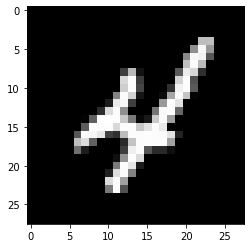

In [ ]:
plt.imshow(x_train[9], cmap='gray');

**Visualiser cette image sous son format de matrice**

In [ ]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

**Afficher la liste des labels**

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Afficher la distribution des labels**

Du jeu d'entrainement

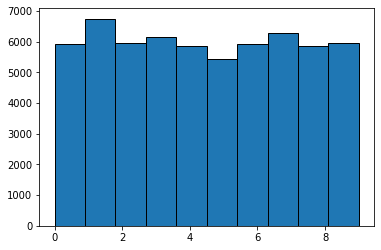

In [ ]:
plt.hist(y_train, edgecolor = 'black');

Du jeu de test

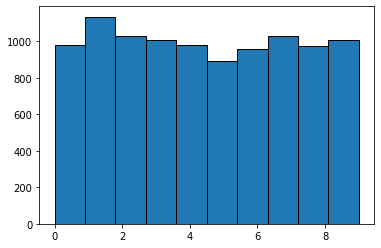

In [ ]:
plt.hist(y_test, edgecolor = 'black');

**Que remarque-t-on ?**

---



*Les données sont bien balancées*

**Afficher pour chaque classe du jeu de données une image lui correspondant**

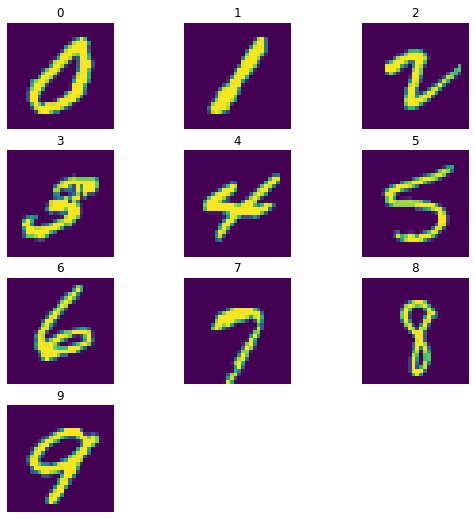

In [ ]:
plt.figure(figsize=(9,9))
for classe in range(10):
  plt.subplot(4, 3, classe+1) 
  ix = np.random.choice(np.where(y_train == classe)[0])
  plt.imshow(x_train[ix])
  plt.axis('off')
  plt.title(classe)

## **4 - Préparation des données**

**Changer le data type des arrays en float32**

In [ ]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

**Normaliser les données afin que les pixels soient compris entre 0 et 1**

In [ ]:
X_train /= 255.0
X_test /= 255.0

**Changer les dimensions des jeux de données afin d'avoir 4 dimensions**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

**Effectuer un One-hot encodage des labels**

On a besoin d'encoder nos labels afin d'en obtenir une meilleure représentation et de ne pas avoir de notion d'ordre

On utilise pour cela une fonction de la librairie de machine learning scikit-learn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()

In [ ]:
Y_train = enc.fit_transform(np.vstack(y_train)).toarray()
Y_test = enc.fit_transform(np.vstack(y_test)).toarray()

**Afficher maintenant les dimensions des labels**

In [ ]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

**Que remarque t'on ?**

---



*Les arrays des labels ont maintenant 2 dimensions*

**Afficher un label non encodé et son équivalent encodé**

In [ ]:
print("Label non encodé :", y_train[0])
print('Label encodé :', Y_train[0])

Label non encodé : 5
Label encodé : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **5 - Definition du modèle**



**Importer les classes et fonctions nécessaires à la construction d'un modèle**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

**Faire une fonction permettant de créer un modèle**

Nous sommes ici dans un cas de classification multi classes il faut donc choisir la fonction de coût et la fonction d'activation de la dernière couche qui correspond au problème.

In [ ]:
def create_model():
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  
  opt = Adam(lr=0.001)
  
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  return model

**Afficher un résumé de votre modèle**

In [ ]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
__________________________________________________

**Entrainer le modèle**

On conserve l'historique de l'entrainement du modèle afin d'evaluer sa progression par la suite.

On utilisera un jeu de validation correspondant à un cinquième du jeu d'entrainement.

In [ ]:
history = model.fit(X_train, Y_train,
                    batch_size=16,
                    epochs=10,
                    validation_split=0.2,
                    shuffle=True)

Epoch 1/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1421 - accuracy: 0.9560 - val_loss: 0.0553 - val_accuracy: 0.9827
Epoch 2/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0488 - val_accuracy: 0.9852
Epoch 3/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0414 - val_accuracy: 0.9887
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0376 - val_accuracy: 0.9889
Epoch 5/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 7/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0394 - val_accuracy:

**Evaluer le modèle sur le jeu de test**

Afficher la loss et l'accuracy du modèle

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

750/750 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9869
Test loss: 0.053440969437360764
Test accuracy: 0.9869166612625122


**Quelle accuracy obtenez-vous ?**

---


*99% d'accuracy*

**Afficher les courbes d'accuracy**

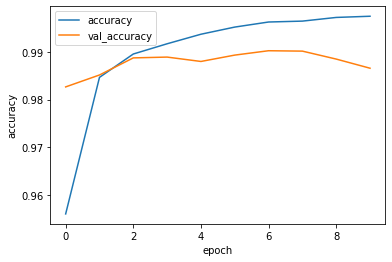

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

## **6 - Visualisation des prédictions**

**Effectuer les prédictions du modèle sur le jeu de test**

In [ ]:
Y_pred = model.predict(X_test, verbose=1)

313/313 [==============================] - 0s 1ms/step


**Afficher les prédictions**

In [ ]:
Y_pred

array([[2.2188621e-20, 1.5495986e-15, 4.8687266e-11, ..., 1.0000000e+00,
        1.3029281e-15, 6.6732958e-10],
       [5.2389538e-12, 3.4843071e-09, 1.0000000e+00, ..., 4.4196220e-21,
        4.0636143e-15, 1.5714377e-17],
       [7.3019398e-15, 1.0000000e+00, 2.1025568e-12, ..., 4.5822438e-10,
        4.8945858e-10, 9.6835415e-15],
       ...,
       [4.3480713e-26, 1.4021489e-13, 5.5660732e-23, ..., 7.6521959e-14,
        6.9051602e-17, 6.2087892e-15],
       [2.0350065e-14, 2.0385509e-20, 2.4375041e-17, ..., 7.8928519e-19,
        3.7136365e-07, 4.5992304e-17],
       [2.7540475e-10, 9.8964541e-20, 6.2524329e-13, ..., 9.5723336e-22,
        7.2444398e-11, 2.0723642e-17]], dtype=float32)

**Afficher les dimensions de l'array des précisions**

In [ ]:
Y_pred.shape

(10000, 10)

**Que remarque-t-on ?**

---



*On obtient les probabilités pour chaque chiffres*

**Transformer les précisions**

Afin d'obternir le chiffre que le modèle prédit

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

**Afficher les prédictions transformées**

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

**Afficher 10 predictions où le modèle s'est trompé**

Afficher les images, leurs labels et leurs prédictions

In [ ]:
ix_wrong_pred = np.where(y_pred != y_test)[0]

In [ ]:
ix_wrong_pred.shape

(137,)

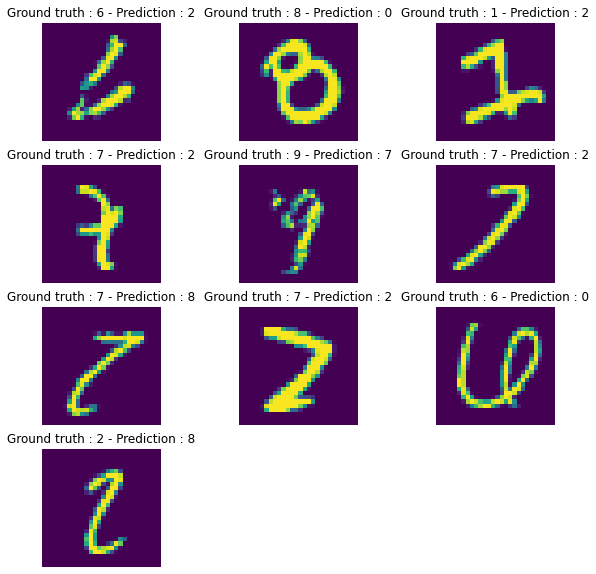

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(4, 3, i+1) 
  ix = np.random.choice(ix_wrong_pred)
  plt.imshow(x_test[ix])
  plt.axis('off')
  plt.title('Ground truth : ' + str(y_test[ix]) + ' - '+ 
            'Prediction : ' + str(y_pred[ix]))

## **7 - Prediction sur une nouvelle image**


On utilise la librairie PIL afin de traiter nos images

**Import le module Image de la librairie PIL**

In [ ]:
from PIL import Image, ImageFilter

**Lire l'image importée**

In [ ]:
img = Image.open('0_2.jpg')

**Afficher l'image**

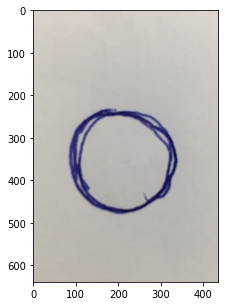

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img);

**Définir une fonction permetant de faire une prédiction sur une image**

In [ ]:
def prediction(image):
  
  image = np.array(image.resize((28,28)).convert('L')) # convertir en noir et blanc
  image = image / 255.0
  image = image.reshape(1,28,28,1)
  
  pred = model.predict(image)[0]
  pred= np.argmax(pred)
 
  return pred

**Effectuer une prédiction de l'image**

In [ ]:
print("Prediction de l'image :", prediction(img))

Prediction de l'image : 3


**Que remarque-t-on ?**

---



La prédiction est éronée.

Car l'image est trop différente de notre jeu de données.

# Fin